<a href="https://colab.research.google.com/github/umoru-ogwu/umoru-ogwu/blob/main/oil_trade_growth_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load & Inspect Data**

In [2]:
df = pd.read_excel("/content/GDP Analysis/oil trade dataset.xlsx")

df.head()

,year,gdp_growth,oil_exports,inflation,exchange_rate,oil_price
0,2000,5.3,2118,6.9,102.11,27.60
1,2001,4.4,2118,18.9,111.23,23.00
2,2002,3.8,2118,12.9,120.58,24.36
3,2003,10.4,2329,14.0,129.22,28.10
4,2004,33.7,2329,15.0,133.50,36.05


Check types & missing

In [3]:
df.info()

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           24 non-null     int64  
 1   gdp_growth     24 non-null     float64
 2   oil_exports    24 non-null     int64  
 3   inflation      24 non-null     float64
 4   exchange_rate  24 non-null     float64
 5   oil_price      24 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.3 KB


,0
year,0
gdp_growth,0
oil_exports,0
inflation,0
exchange_rate,0
oil_price,0


**Exploratory Analysis**

Time-series trends

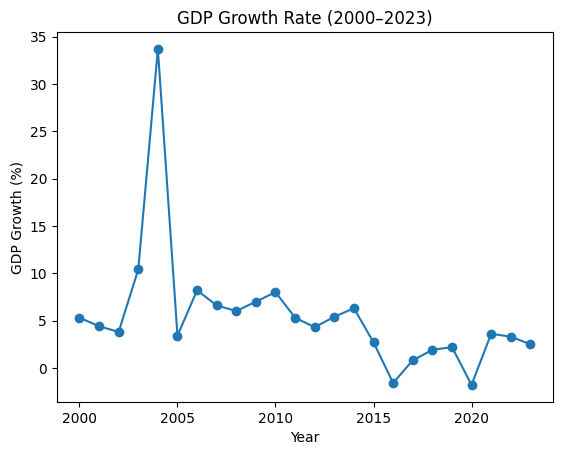

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure()
plt.plot(df['year'], df['gdp_growth'], marker='o')
plt.title('GDP Growth Rate (2000–2023)')
plt.xlabel('Year'); plt.ylabel('GDP Growth (%)')
plt.show()

plt.savefig('gdp_growth.png')

Scatter & correlation

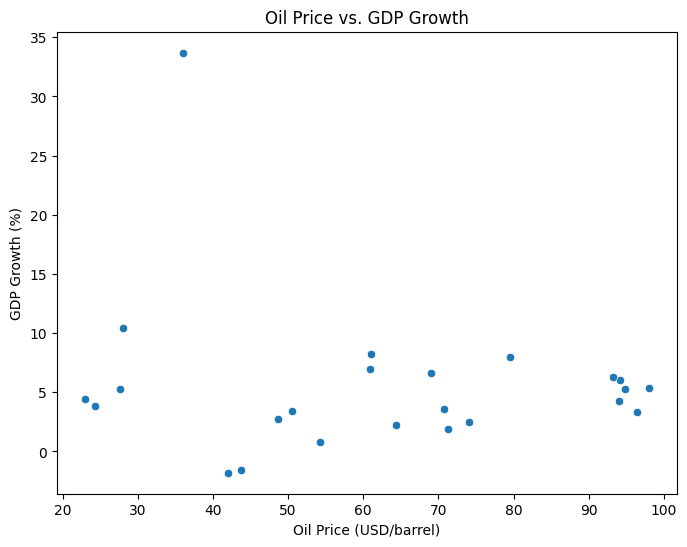

Correlation between oil price and GDP growth: -0.14126772470816873


<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oil_price', y='gdp_growth', data=df)
plt.title('Oil Price vs. GDP Growth')
plt.xlabel('Oil Price (USD/barrel)'); plt.ylabel('GDP Growth (%)')
plt.show()

correlation = df['oil_price'].corr(df['gdp_growth'])
print(f'Correlation between oil price and GDP growth: {correlation}')

plt.savefig('oil_price_gdp_growth.png')


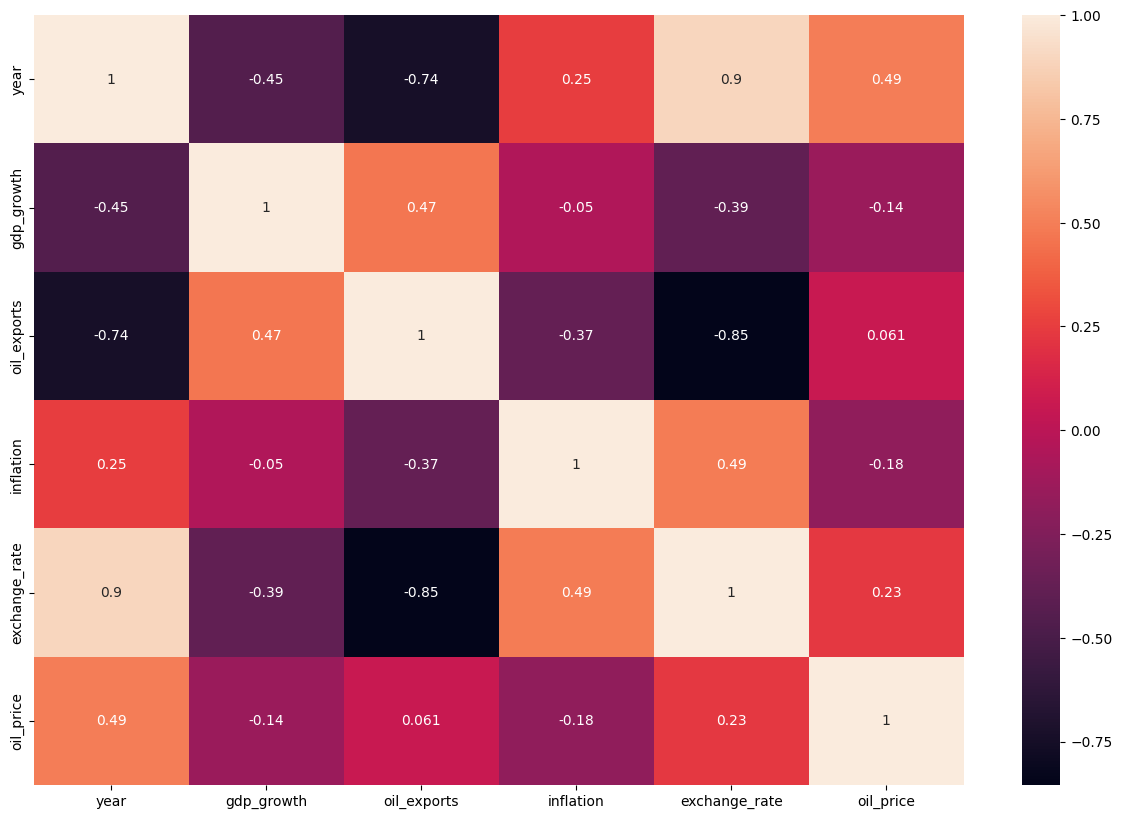

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

plt.savefig('heatmap.png')

**Stationarity & Cointegration**

In [7]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f'ADF {name}: p-value = {result[1]:.4f}')

for series in ['gdp_growth','oil_exports','oil_price','inflation','exchange_rate']:
    adf_test(df[series], series)
plt.savefig('adf.png')

ADF gdp_growth: p-value = 0.0034
ADF oil_exports: p-value = 0.0000
ADF oil_price: p-value = 0.2299
ADF inflation: p-value = 0.9388
ADF exchange_rate: p-value = 0.9987


<Figure size 640x480 with 0 Axes>

Here's a breakdown of your ADF test results:

ADF gdp_growth: p-value = 0.0034: The p-value is less than 0.05, suggesting that we reject the null hypothesis. This indicates that the gdp_growth series is stationary.

ADF oil_exports: p-value = 0.0000: The p-value is much less than 0.05, strongly suggesting that we reject the null hypothesis. This indicates that the oil_exports series is stationary.

ADF oil_price: p-value = 0.2299: The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis. This suggests that the oil_price series is non-stationary.

ADF inflation: p-value = 0.9388: The p-value is much greater than 0.05, strongly suggesting that we fail to reject the null hypothesis. This indicates that the inflation series is non-stationary.

ADF exchange_rate: p-value = 0.9987: The p-value is much greater than 0.05, strongly suggesting that we fail to reject the null hypothesis. This indicates that the exchange_rate series is non-stationary.

Based on these results, we can conclude the following:

gdp_growth and oil_exports are likely stationary time series.
oil_price, inflation, and exchange_rate are likely non-stationary time series.

In [8]:
df['d_oil_price']   = df['oil_price'].diff()
df['d_inflation'] = df['inflation'].diff()
df['d_exchange_rate']  = df['exchange_rate'].diff()


**OLS Regression**

In [9]:
# prompt: OLS Regression

import statsmodels.api as sm

# Define the dependent and independent variables
y = df['gdp_growth']
X = df[['oil_price', 'oil_exports', 'inflation', 'exchange_rate']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

plt.savefig('ols_regression.png')


                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1.767
Date:                Tue, 29 Apr 2025   Prob (F-statistic):              0.177
Time:                        21:40:24   Log-Likelihood:                -75.279
No. Observations:                  24   AIC:                             160.6
Df Residuals:                      19   BIC:                             166.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -20.6713     18.798     -1.100

<Figure size 640x480 with 0 Axes>

Overall Model Fit:

R-squared (0.271): This indicates that the model explains about 27.1% of the variance in GDP growth. This is a relatively low R-squared, suggesting that the independent variables included in the model do not fully capture the factors influencing GDP growth.
Adj. R-squared (0.118): The adjusted R-squared is even lower, indicating that the model might be overfitting the data to some extent.
F-statistic (1.767, p-value = 0.177): The F-statistic tests the overall significance of the model. The relatively high p-value suggests that the model is not statistically significant as a whole. This means that the independent variables, together, do not have a significant impact on GDP growth.
Coefficients:

const (-20.6713, p-value = 0.285): This is the intercept of the regression line. It is not statistically significant.
oil_price (-0.0640, p-value = 0.373): The coefficient for oil price is negative and not statistically significant. This suggests that changes in oil price do not have a significant effect on GDP growth, at least not in a linear way.
oil_exports (0.0128, p-value = 0.131): The coefficient for oil exports is positive and also not statistically significant, although it is closer to significance than the other variables. This suggests that increases in oil exports might be associated with increases in GDP growth, but the relationship is not statistically strong.
inflation (0.0807, p-value = 0.855): The coefficient for inflation is positive but not statistically significant. This indicates that changes in inflation do not have a significant effect on GDP growth.
exchange_rate (0.0158, p-value = 0.615): The coefficient for the exchange rate is positive and not statistically significant. This implies that changes in the exchange rate do not have a significant effect on GDP growth.
Overall Interpretation:

The OLS regression results suggest that the model, as specified, does not provide a strong explanation for variations in GDP growth. None of the independent variables (oil price, oil exports, inflation, exchange rate) have statistically significant coefficients. This could be due to a variety of reasons:

Missing Variables: There might be other important factors influencing GDP growth that are not included in the model.
Nonlinear Relationships: The relationship between GDP growth and the independent variables might be nonlinear. You could explore nonlinear transformations of the variables or consider using different regression techniques.
Data Limitations: The dataset might be too small or not representative enough to capture the true relationships between the variables.
Cointegration: The time-series properties of the variables, especially if they are non-stationary, might need to be considered more carefully. You could explore techniques like vector autoregression (VAR) or error correction models (ECM) if cointegration is present.
Important Notes:

Causality: Remember that correlation does not imply causation.
Model Assumptions: You should check the assumptions of OLS regression to ensure the validity of the results. This includes testing for linearity, homoscedasticity, and multicollinearity.